In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', 100)

In [2]:
Cases = pd.read_csv('data/Cases2018.csv', encoding='iso-8859-1')
OldCases = pd.read_csv('data/OldCases.csv', encoding='iso-8859-1')

In [3]:
FullCases = Cases.append(OldCases)

In [202]:
len(FullCases)

27645

In [7]:
FullCases[['dateArgument','dateRearg']]=FullCases[['dateArgument', 'dateRearg']].notnull().astype(int)

In [8]:
FullCases['partyWinning'] = FullCases[['partyWinning']].fillna(value=2.0)

In [9]:
FullCases.drop(FullCases[FullCases.partyWinning==2.0].index, inplace = True)

In [15]:
FullCases.groupby('petitioner').count()

caseId  docketId  caseIssuesId  voteId  dateDecision  \
petitioner                                                         
1.0             43        43            43      43            43   
2.0              5         5             5       5             5   
3.0            434       434           434     434           434   
4.0            240       240           240     240           240   
5.0            243       243           243     243           243   
6.0             10        10            10      10            10   
7.0             85        85            85      85            85   
8.0            217       217           217     217           217   
9.0              7         7             7       7             7   
10.0             7         7             7       7             7   
11.0             3         3             3       3             3   
12.0             3         3             3       3             3   
13.0            23        23            23      23            23   
14.0             4         4             4       4             4   
15.0             4         4             4       4             4   
16.0            41        41            41      41            41   
17.0             7         7             7       7             7   
18.0            11        11            11      11            11   
19.0           599       599           599     599           599   
20.0             7         7             7       7             7   
21.0            72        72            72      72            72   
22.0             2         2             2       2             2   
23.0             9         9             9       9             9   
24.0            37        37            37      37            37   
25.0           260       260           260     260           260   
26.0            28        28            28      28            28   
27.0          2292      2292          2292    2292          2292   
28.0          1229      1229          1229    1229          1229   
100.0          696       696           696     696           696   
101.0            9         9             9       9             9   
...            ...       ...           ...     ...           ...   
377.0            5         5             5       5             5   
378.0            1         1             1       1             1   
379.0            2         2             2       2             2   
382.0          134       134           134     134           134   
388.0            1         1             1       1             1   
389.0            8         8             8       8             8   
390.0            4         4             4       4             4   
391.0            1         1             1       1             1   
393.0            4         4             4       4             4   
394.0           13        13            13      13            13   
396.0            2         2             2       2             2   
397.0            1         1             1       1             1   
400.0            2         2             2       2             2   
402.0            3         3             3       3             3   
404.0            1         1             1       1             1   
405.0           18        18            18      18            18   
406.0            6         6             6       6             6   
407.0            2         2             2       2             2   
408.0           18        18            18      18            18   
409.0            2         2             2       2             2   
410.0            3         3             3       3             3   
411.0            1         1             1       1             1   
412.0           20        20            20      20            20   
414.0            8         8             8       8             8   
416.0            1         1             1       1             1   
418.0            1         1             1       1             1   


In [16]:
# most frequent petitioner/respondent is United States followed by individual states

In [51]:
1000*

60000000

In [43]:
FullCases.groupby('petitioner')['lcDisagreement'].count()

petitioner
1.0        43
2.0         5
3.0       434
4.0       240
5.0       243
6.0        10
7.0        85
8.0       217
9.0         7
10.0        7
11.0        3
12.0        3
13.0       23
14.0        4
15.0        4
16.0       41
17.0        7
18.0       11
19.0      599
20.0        7
21.0       72
22.0        2
23.0        9
24.0       36
25.0      260
26.0       28
27.0     2289
28.0     1215
100.0     696
101.0       9
         ... 
377.0       5
378.0       1
379.0       2
382.0     134
388.0       1
389.0       8
390.0       4
391.0       1
393.0       4
394.0      13
396.0       2
397.0       1
400.0       2
402.0       3
404.0       1
405.0      18
406.0       6
407.0       2
408.0      18
409.0       2
410.0       3
411.0       1
412.0      20
414.0       8
416.0       1
418.0       1
420.0       5
421.0       6
501.0     545
600.0      10
Name: lcDisagreement, Length: 271, dtype: int64

In [31]:
wins = FullCases[FullCases['partyWinning']==1.0]

In [171]:
wins.groupby('issueArea').count()

caseId  docketId  caseIssuesId  voteId  dateDecision  decisionType  \
issueArea                                                                       
1.0          1715      1715          1715    1715          1715          1715   
2.0          1323      1323          1323    1323          1323          1323   
3.0           467       467           467     467           467           467   
4.0           485       485           485     485           485           485   
5.0            83        83            83      83            83            83   
6.0           161       161           161     161           161           161   
7.0           277       277           277     277           277           277   
8.0          3305      3305          3305    3305          3305          3305   
9.0          1829      1829          1829    1829          1829          1829   
10.0          448       448           448     448           448           448   
11.0          101       101           101     101           101           101   
12.0          612       612           612     612           612           612   
13.0           30        30            30      30            30            30   
14.0         1113      1113          1113    1113          1113          1113   

           usCite  sctCite  ledCite  lexisCite  term  naturalCourt  chief  \
issueArea                                                                   
1.0          1625     1655     1711       1715  1715          1715   1715   
2.0          1263     1202     1318       1323  1323          1323   1323   
3.0           452      462      467        467   467           467    467   
4.0           469      379      483        485   485           485    485   
5.0            77       82       82         83    83            83     83   
6.0           155      142      161        161   161           161    161   
7.0           267      275      277        277   277           277    277   
8.0          3235     2710     3303       3305  3305          3305   3305   
9.0          1789     1428     1827       1829  1829          1829   1829   
10.0          440      390      448        448   448           448    448   
11.0           97       88       99        101   101           101    101   
12.0          607      540      612        612   612           612    612   
13.0           28       23       30         30    30            30     30   
14.0         1111      503     1112       1113  1113          1113   1113   

           docket  caseName  dateArgument  dateRearg  petitioner  \
issueArea                                                          
1.0          1669      1715          1715       1715        1715   
2.0          1239      1323          1323       1323        1323   
3.0           463       467           467        467         467   
4.0           392       485           485        485         485   
5.0            83        83            83         83          83   
6.0           148       161           161        161         161   
7.0           277       277           277        277         277   
8.0          2863      3303          3305       3305        3305   
9.0          1483      1829          1829       1829        1829   
10.0          394       448           448        448         448   
11.0           91       101           101        101         101   
12.0          566       612           612        612         612   
13.0           26        30            30         30          30   
14.0          598      1113          1113       1113        1113   

           petitionerState  respondent  respondentState  jurisdiction  \
issueArea                                                               
1.0                    381        1715              491          1715   
2.0                    228        1323              397          1323   
3.0                     95         467              230           467   
4.0                     83 

In [36]:
losses = FullCases[FullCases['partyWinning']==0.0]

In [172]:
losses.groupby('issueArea').count()

caseId  docketId  caseIssuesId  voteId  dateDecision  decisionType  \
issueArea                                                                       
1.0          1231      1231          1231    1231          1231          1231   
2.0          1251      1251          1251    1251          1251          1251   
3.0           291       291           291     291           291           291   
4.0           609       609           609     609           609           608   
5.0            48        48            48      48            48            48   
6.0           164       164           164     164           164           164   
7.0           220       220           220     220           220           220   
8.0          4799      4799          4799    4799          4799          4799   
9.0          3481      3481          3481    3481          3481          3481   
10.0          397       397           397     397           397           397   
11.0          107       107           107     107           107           107   
12.0          798       798           798     798           798           798   
13.0           71        71            71      71            71            71   
14.0         2132      2132          2132    2132          2132          2132   

           usCite  sctCite  ledCite  lexisCite  term  naturalCourt  chief  \
issueArea                                                                   
1.0          1193     1150     1227       1231  1231          1231   1231   
2.0          1225     1053     1248       1251  1251          1251   1251   
3.0           283      285      290        291   291           291    291   
4.0           605      450      606        609   609           609    609   
5.0            46       48       48         48    48            48     48   
6.0           161      141      164        164   164           164    164   
7.0           215      218      220        220   220           220    220   
8.0          4763     3695     4792       4799  4799          4799   4799   
9.0          3458     2439     3475       3481  3481          3481   3481   
10.0          386      337      396        397   397           397    397   
11.0          107       98      107        107   107           107    107   
12.0          795      649      797        798   798           798    798   
13.0           68       52       71         71    71            71     71   
14.0         2132     1100     2131       2132  2132          2132   2132   

           docket  caseName  dateArgument  dateRearg  petitioner  \
issueArea                                                          
1.0          1148      1231          1231       1231        1231   
2.0          1113      1251          1251       1251        1251   
3.0           287       291           291        291         291   
4.0           494       609           609        609         609   
5.0            48        48            48         48          48   
6.0           146       164           164        164         164   
7.0           218       220           220        220         220   
8.0          4104      4795          4799       4799        4799   
9.0          2539      3481          3481       3481        3481   
10.0          350       397           397        397         397   
11.0           92       107           107        107         107   
12.0          711       798           798        798         798   
13.0           58        71            71         71          71   
14.0         1372      2132          2132       2132        2132   

           petitionerState  respondent  respondentState  jurisdiction  \
issueArea                                                               
1.0                    112        1231              459          1231   
2.0                    182        1251              263          1251   
3.0                     71         291              102           291   
4.0                     57 

In [52]:
wins.groupby('issueArea').count()

caseId  docketId  caseIssuesId  voteId  dateDecision  decisionType  \
issueArea                                                                       
1.0          1715      1715          1715    1715          1715          1715   
2.0          1323      1323          1323    1323          1323          1323   
3.0           467       467           467     467           467           467   
4.0           485       485           485     485           485           485   
5.0            83        83            83      83            83            83   
6.0           161       161           161     161           161           161   
7.0           277       277           277     277           277           277   
8.0          3305      3305          3305    3305          3305          3305   
9.0          1829      1829          1829    1829          1829          1829   
10.0          448       448           448     448           448           448   
11.0          101       101           101     101           101           101   
12.0          612       612           612     612           612           612   
13.0           30        30            30      30            30            30   
14.0         1113      1113          1113    1113          1113          1113   

           usCite  sctCite  ledCite  lexisCite  term  naturalCourt  chief  \
issueArea                                                                   
1.0          1625     1655     1711       1715  1715          1715   1715   
2.0          1263     1202     1318       1323  1323          1323   1323   
3.0           452      462      467        467   467           467    467   
4.0           469      379      483        485   485           485    485   
5.0            77       82       82         83    83            83     83   
6.0           155      142      161        161   161           161    161   
7.0           267      275      277        277   277           277    277   
8.0          3235     2710     3303       3305  3305          3305   3305   
9.0          1789     1428     1827       1829  1829          1829   1829   
10.0          440      390      448        448   448           448    448   
11.0           97       88       99        101   101           101    101   
12.0          607      540      612        612   612           612    612   
13.0           28       23       30         30    30            30     30   
14.0         1111      503     1112       1113  1113          1113   1113   

           docket  caseName  dateArgument  dateRearg  petitioner  \
issueArea                                                          
1.0          1669      1715          1715       1715        1715   
2.0          1239      1323          1323       1323        1323   
3.0           463       467           467        467         467   
4.0           392       485           485        485         485   
5.0            83        83            83         83          83   
6.0           148       161           161        161         161   
7.0           277       277           277        277         277   
8.0          2863      3303          3305       3305        3305   
9.0          1483      1829          1829       1829        1829   
10.0          394       448           448        448         448   
11.0           91       101           101        101         101   
12.0          566       612           612        612         612   
13.0           26        30            30         30          30   
14.0          598      1113          1113       1113        1113   

           petitionerState  respondent  respondentState  jurisdiction  \
issueArea                                                               
1.0                    381        1715              491          1715   
2.0                    228        1323              397          1323   
3.0                     95         467              230           467   
4.0                     83 

In [46]:
len(wins)

11950

In [47]:
len(losses)

15695

In [48]:
#supreme court rules against petitioner in cases involving judicial power

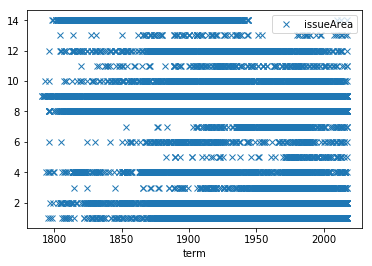

In [60]:
FullCases.plot.line(x='term', y='issueArea', style='x')

In [134]:
import matplotlib
matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt
FullCases2 = FullCases[['term','issueArea']]
plt.figure(figsize=(6.0,6.0))
FullCases2.groupby(['term','issueArea']).count().unstack().plot()


TypeError: Empty 'DataFrame': no numeric data to plot

<Figure size 432x432 with 0 Axes>

In [136]:
ctdf = (FullCases2.reset_index()
          .groupby(['term','issueArea'], as_index=False)
          .count()
          # rename isn't strictly necessary here, it's just for readability
          .rename(columns={'index':'ct'})
       )

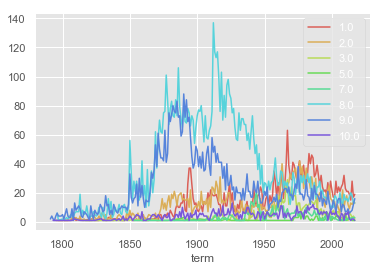

In [167]:
sns.set_palette(sns.color_palette("hls", 10))
from matplotlib import pyplot as plt
fig, ax = plt.subplots()

# key gives the group name (i.e. category), data gives the actual values
for key, data in ctdf.groupby('issueArea'):
    if key not in (14.0,13.0,12.0,6.0,11.0, 4.0):
        data.plot(x='term', y='ct', ax=ax, label=key)

In [156]:
for key, data in ctdf.groupby('issueArea'):
    print(key)

1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0


In [197]:
FullCases3 = FullCases[['issueArea','partyWinning']]

In [198]:
array = [8.0, 1.0, 4.0, 3.0, 9.0]
FullCases3 = FullCases3.loc[FullCases3['issueArea'].isin(array)]


In [199]:
from statsmodels.graphics.mosaicplot import mosaic

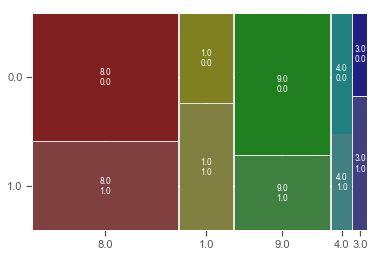

In [200]:
mos = mosaic(FullCases3, ['issueArea', 'partyWinning'])

In [155]:
pd.set_option('display.max_rows', 1500)
FullCases.groupby(['term', 'issueArea']).count()

caseId  docketId  caseIssuesId  voteId  dateDecision  \
term issueArea                                                         
1791 9.0             2         2             2       2             2   
1792 9.0             4         4             4       4             4   
1793 9.0             2         2             2       2             2   
     10.0            1         1             1       1             1   
1794 4.0             1         1             1       1             1   
     9.0             1         1             1       1             1   
1795 1.0             1         1             1       1             1   
     4.0             1         1             1       1             1   
     9.0             4         4             4       4             4   
1796 4.0             1         1             1       1             1   
     6.0             1         1             1       1             1   
     8.0             6         6             6       6             6   
     9.0             6         6             6       6             6   
     10.0            1         1             1       1             1   
     12.0            1         1             1       1             1   
1797 1.0             1         1             1       1             1   
     2.0             1         1             1       1             1   
     4.0             1         1             1       1             1   
     8.0             1         1             1       1             1   
     9.0             4         4             4       4             4   
1798 1.0             1         1             1       1             1   
     9.0             4         4             4       4             4   
     14.0            1         1             1       1             1   
1799 2.0             1         1             1       1             1   
     4.0             1         1             1       1             1   
     9.0             4         4             4       4             4   
     14.0            1         1             1       1             1   
1800 4.0             1         1             1       1             1   
     8.0             2         2             2       2             2   
     9.0             5         5             5       5             5   
1801 8.0             1         1             1       1             1   
     9.0             2         2             2       2             2   
     14.0            3         3             3       3             3   
1803 2.0             1         1             1       1             1   
     8.0             3         3             3       3             3   
     9.0             9         9             9       9             9   
     14.0            6         6             6       6             6   
1804 2.0             1         1             1       1             1   
     8.0             2         2             2       2             2   
     9.0             4         4             4       4             4   
     12.0            1         1             1       1             1   
     13.0            1         1             1       1             1   
     14.0            4         4             4       4             4   
1805 2.0             4         4             4       4             4   
     6.0             1         1             1       1             1   
     8.0             3         3             3       3             3   
     9.0             3         3             3       3             3   
     12.0            2         2             2       2             2   
     14.0            7         7             7       7             7   
1806 1.0             1         1             1       1             1   
     2.0             3         3             3       3             3   
     4.0             1         1             1       1             1   
     8.0             5         5             5       5             5   
     9.0             3         3             3       3  

In [212]:
FullCases4 = FullCases[['term', 'partyWinning']]

In [211]:
FullCases2.head()

term  issueArea
0  1946        8.0
1  1946        1.0
2  1946        8.0
3  1946        2.0
4  1946        8.0

In [ ]:
#plot winning frequency by year

In [213]:
ctdf2 = (FullCases4.reset_index()
          .groupby(['term','partyWinning'], as_index=False)
          .count()
          # rename isn't strictly necessary here, it's just for readability
          .rename(columns={'index':'ct'})
       )

In [218]:
ctdf2.tail(30)

term  partyWinning  ct
419  2003           0.0  20
420  2003           1.0  59
421  2004           0.0  25
422  2004           1.0  54
423  2005           0.0  24
424  2005           1.0  59
425  2006           0.0  25
426  2006           1.0  49
427  2007           0.0  29
428  2007           1.0  44
429  2008           0.0  21
430  2008           1.0  62
431  2009           0.0  23
432  2009           1.0  66
433  2010           0.0  27
434  2010           1.0  57
435  2011           0.0  32
436  2011           1.0  45
437  2012           0.0  25
438  2012           1.0  52
439  2013           0.0  22
440  2013           1.0  53
441  2014           0.0  21
442  2014           1.0  49
443  2015           0.0  33
444  2015           1.0  47
445  2016           0.0  16
446  2016           1.0  53
447  2017           0.0  22
448  2017           1.0  53

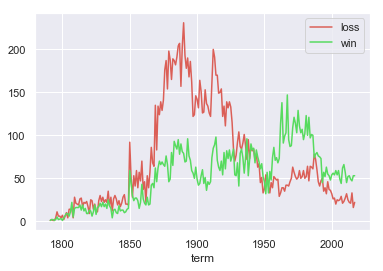

In [240]:
sns.set_palette(sns.color_palette("hls", 3))
from matplotlib import pyplot as plt
fig, ax = plt.subplots()
labels = {0.0:"loss", 1.0:'win'}

# key gives the group name (i.e. category), data gives the actual values
for key, data in ctdf2.groupby('partyWinning'):
        data.plot(x='term', y='ct', ax=ax, label=labels[key])

In [254]:
FullCases.groupby('term').partyWinning.value_counts()

term  partyWinning
1791  0.0               1
      1.0               1
1792  0.0               2
      1.0               2
1793  1.0               2
      0.0               1
1794  0.0               1
      1.0               1
1795  0.0               4
      1.0               2
1796  0.0              11
      1.0               5
1797  0.0               6
      1.0               2
1798  0.0               6
1799  0.0               4
      1.0               3
1800  0.0               7
      1.0               1
1801  1.0               4
      0.0               2
1803  0.0              10
      1.0               9
1804  1.0               9
      0.0               4
1805  0.0              14
      1.0               6
1806  0.0              14
      1.0              11
1807  1.0              22
      0.0              14
1808  1.0               5
      0.0               4
1809  0.0              28
      1.0              15
1810  0.0              21
      1.0              16
1812  0.0          

In [236]:
ctdf2

term  partyWinning   ct
0    1791           0.0    1
1    1791           1.0    1
2    1792           0.0    2
3    1792           1.0    2
4    1793           0.0    1
5    1793           1.0    2
6    1794           0.0    1
7    1794           1.0    1
8    1795           0.0    4
9    1795           1.0    2
10   1796           0.0   11
11   1796           1.0    5
12   1797           0.0    6
13   1797           1.0    2
14   1798           0.0    6
15   1799           0.0    4
16   1799           1.0    3
17   1800           0.0    7
18   1800           1.0    1
19   1801           0.0    2
20   1801           1.0    4
21   1803           0.0   10
22   1803           1.0    9
23   1804           0.0    4
24   1804           1.0    9
25   1805           0.0   14
26   1805           1.0    6
27   1806           0.0   14
28   1806           1.0   11
29   1807           0.0   14
30   1807           1.0   22
31   1808           0.0    4
32   1808           1.0    5
33   1809           0.0   28
34   1809           1.0   15
35   1810           0.0   21
36   1810           1.0   16
37   1812           0.0   19
38   1812           1.0   16
39   1813           0.0   26
40   1813           1.0   19
41   1814           0.0   27
42   1814           1.0   13
43   1815           0.0   17
44   1815           1.0   19
45   1816           0.0   22
46   1816           1.0   12
47   1817           0.0   21
48   1817           1.0   15
49   1818           0.0   23
50   1818           1.0    9
51   1819           0.0   17
52   1819           1.0    9
53   1820           0.0    9
54   1820           1.0   13
55   1821           0.0   25
56   1821           1.0   12
57   1822           0.0   24
58   1822           1.0    6
59   1823           0.0   14
60   1823           1.0   11
61   1824           0.0   20
62   1824           1.0   19
63   1825           0.0   12
64   1825           1.0    8
65   1826           0.0   11
66   1826           1.0   16
67   1827           0.0   24
68   1827           1.0   17
69   1828           0.0   30
70   1828           1.0   21
71   1829           0.0   23
72   1829           1.0   17
73   1830           0.0   28
74   1830           1.0   22
75   1831           0.0   22
76   1831           1.0   17
77   1832           0.0   25
78   1832           1.0   20
79   1833           0.0   22
80   1833           1.0   15
81   1834           0.0   35
82   1834           1.0   25
83   1835           0.0   18
84   1835           1.0   18
85   1836           0.0   28
86   1836           1.0   15
87   1837           0.0   12
88   1837           1.0    4
89   1838           0.0   26
90   1838           1.0   13
91   1839           0.0   30
92   1839           1.0   14
93   1840           0.0   26
94   1840           1.0   10
95   1841           0.0   19
96   1841           1.0    9
97   1842           0.0   24
98   1842           1.0   18
99   1843           0.0   17
100  1843           1.0   12
101  1844           0.0   21
102  1844           1.0   13
103  1845           0.0   28
104  1845           1.0   13
105  1846           0.0   31
106  1846           1.0   10
107  1847           0.0   20
108  1847           1.0   11
109  1848           0.0   20
110  1848           1.0   14
111  1849           0.0   19
112  1849           1.0   15
113  1850           0.0   92
114  1850           1.0   59
115  1851           0.0   50
116  1851           1.0   45
117  1852           0.0   28
118  1852           1.0   30
119  1853           0.0   53
120  1853           1.0   24
121  1854           0.0   41
122  1854           1.0   27
123  1855           0.0   59
124  1855           1.0   27
125  1856           0.0   39
126  1856           1.0   24
127  1857           0.0   57
128  1857           1.0   15
129  1858           0.0   47
130  1858           1.0   22
131  1859           0.0   70
132  1859           1.0   43
133  1860           0.0   37
134  1860           1.0   26
135  1861           0.0   46
136  1861           1.0   21
137

In [256]:
FullCases[FullCases.term==1882].count()

caseId                      254
docketId                    254
caseIssuesId                254
voteId                      254
dateDecision                254
decisionType                254
usCite                      254
sctCite                     249
ledCite                     254
lexisCite                   254
term                        254
naturalCourt                254
chief                       254
docket                      207
caseName                    253
dateArgument                254
dateRearg                   254
petitioner                  254
petitionerState              35
respondent                  254
respondentState              34
jurisdiction                254
adminAction                  73
adminActionState             45
threeJudgeFdc               254
caseOrigin                  250
caseOriginState              34
caseSource                  251
caseSourceState              35
lcDisagreement              254
certReason                  254
lcDispos

In [259]:
FullCases[FullCases['lcDisagreement']==1.0].count()

caseId                      2368
docketId                    2368
caseIssuesId                2368
voteId                      2368
dateDecision                2368
decisionType                2368
usCite                      2222
sctCite                     2260
ledCite                     2360
lexisCite                   2368
term                        2368
naturalCourt                2368
chief                       2368
docket                      2301
caseName                    2368
dateArgument                2368
dateRearg                   2368
petitioner                  2368
petitionerState              500
respondent                  2368
respondentState              565
jurisdiction                2368
adminAction                  679
adminActionState             189
threeJudgeFdc               2366
caseOrigin                  2358
caseOriginState              608
caseSource                  2368
caseSourceState              529
lcDisagreement              2368
certReason

In [262]:
wins[wins['lcDisagreement']==1.0].count()

caseId                      1594
docketId                    1594
caseIssuesId                1594
voteId                      1594
dateDecision                1594
decisionType                1594
usCite                      1487
sctCite                     1538
ledCite                     1587
lexisCite                   1594
term                        1594
naturalCourt                1594
chief                       1594
docket                      1558
caseName                    1594
dateArgument                1594
dateRearg                   1594
petitioner                  1594
petitionerState              348
respondent                  1594
respondentState              364
jurisdiction                1594
adminAction                  428
adminActionState             102
threeJudgeFdc               1593
caseOrigin                  1588
caseOriginState              400
caseSource                  1594
caseSourceState              350
lcDisagreement              1594
certReason

In [263]:
losses[losses['lcDisagreement']==1.0].count()

caseId                      774
docketId                    774
caseIssuesId                774
voteId                      774
dateDecision                774
decisionType                774
usCite                      735
sctCite                     722
ledCite                     773
lexisCite                   774
term                        774
naturalCourt                774
chief                       774
docket                      743
caseName                    774
dateArgument                774
dateRearg                   774
petitioner                  774
petitionerState             152
respondent                  774
respondentState             201
jurisdiction                774
adminAction                 251
adminActionState             87
threeJudgeFdc               773
caseOrigin                  770
caseOriginState             208
caseSource                  774
caseSourceState             179
lcDisagreement              774
certReason                  772
lcDispos

In [264]:
len(wins), len(losses)

(11950, 15695)

11950